In [1]:
from datetime import datetime
from collections import defaultdict
import re
import pickle
import pandas as pd
from netCDF4 import Dataset, num2date #pylint: disable=no-name-in-module
import numpy as np
import numpy.ma as ma

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import scipy.optimize as opt
from scipy.stats import linregress
import seaborn as sn
import cmasher as cmr
import mpl_axes_aligner

import os
import sys
from pathlib import Path
path = Path(os.getcwd())
path_parent=str(path.parent.absolute())
path_module=path_parent+'/src/SuPerSim'
sys.path.insert(0, os.path.abspath(path_module))

from SuPerSim.functions_summary import *
from SuPerSim.pickling import get_all_stats

In [2]:
################################################
# Here, write the paths to your own data files #
################################################

# this is just introduced for convenience
path_data = path_parent+'/examples/data/'
path_data_North = path_data+'North/'
path_data_South = path_data+'South/'
path_forcing_merra2 = path_data+'/scaled_merra2_Aksaut.nc'

# those are the real variables
list_path_forcing_list = [[path_forcing_merra2], [path_forcing_merra2]]
list_path_ground = [path_data_North+'result_soil_temperature.nc', path_data_South+'result_soil_temperature.nc']
list_path_snow = [path_data_North+'result_snow_depth.nc', path_data_South+'result_snow_depth.nc']
list_path_swe = [path_data_North+'result_swe.nc', path_data_South+'result_swe.nc']
list_path_SW_direct = [path_data_North+'result_SW_direct.nc', path_data_South+'result_SW_direct.nc']
list_path_SW_diffuse = [path_data_North+'result_SW_diffuse.nc', path_data_South+'result_SW_diffuse.nc']
list_path_SW_up = [path_data_North+'result_SW_up.nc', path_data_South+'result_SW_up.nc']
list_path_SW_down = [path_data_North+'result_SW_down.nc', path_data_South+'result_SW_down.nc']
list_path_SW_net = [path_data_North+'result_SW_net.nc', path_data_South+'result_SW_net.nc']
list_path_LW_net = [path_data_North+'result_LW_net.nc', path_data_South+'result_LW_net.nc']
list_path_pickle = [path_parent+'/examples/python_pickles/', path_parent+'/examples/python_pickles/']

###############################################################
# Enter the parameters of your site and of the rockfall event #
###############################################################

list_site = ['Aksaut_North', 'Aksaut_South']
list_label_site = ['North', 'South']
year_bkg_end = 2000
year_trans_end = 2023

Series of plots comparing both sites.
Plot of a single timeseries reduced to a 1-year window with mean and 1 and 2-sigma spread, for both sites:


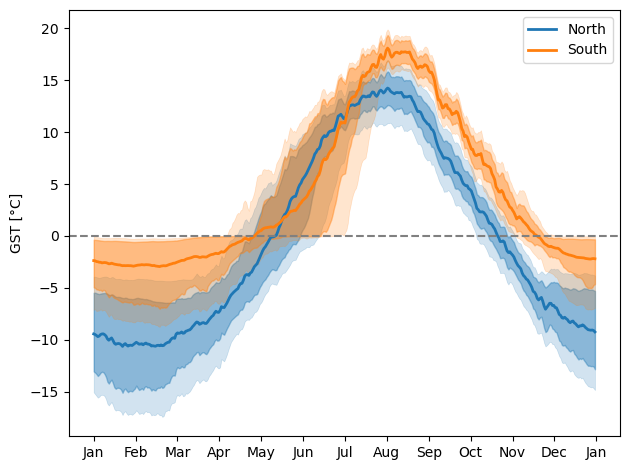

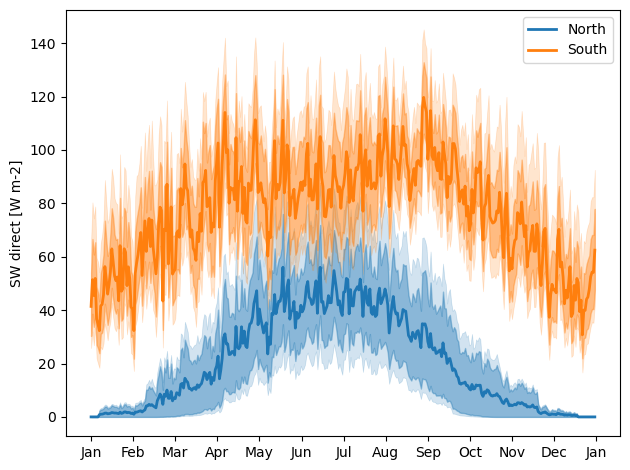

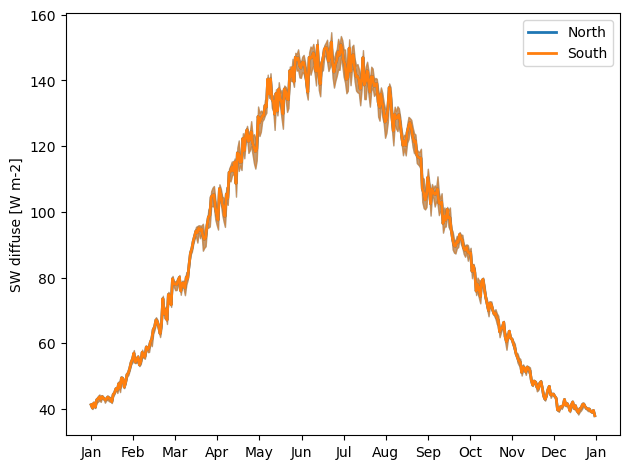

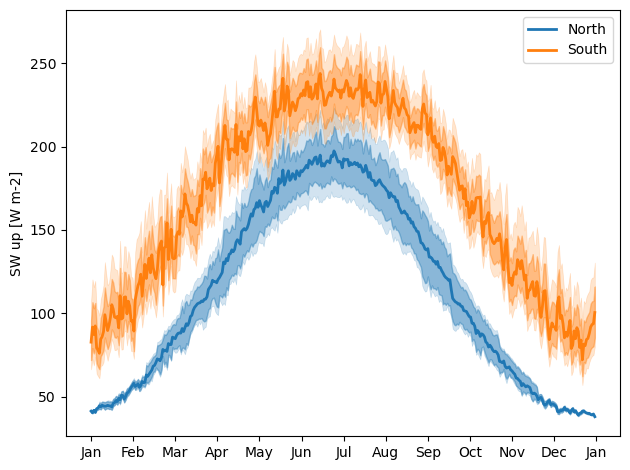

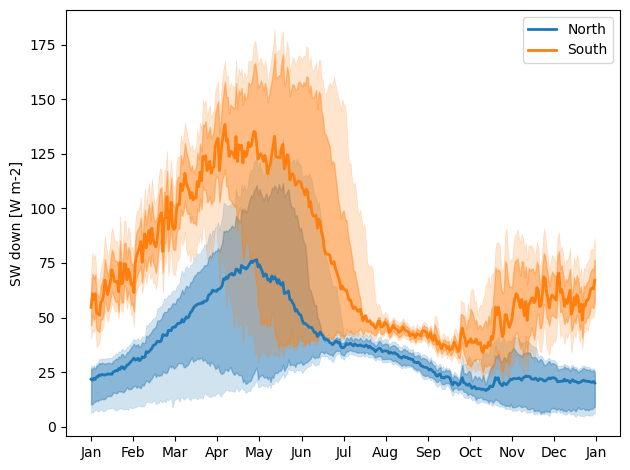

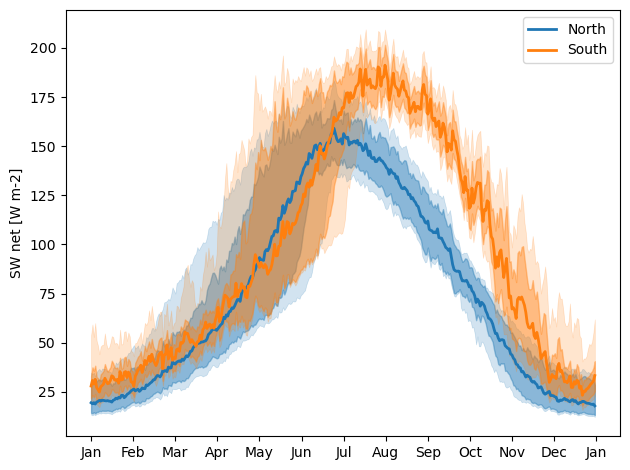

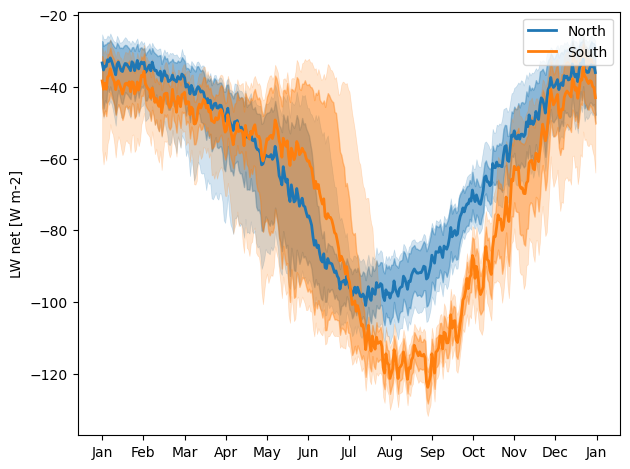

Plot of seasonal statistics for GST and SW net for both sites side by side:


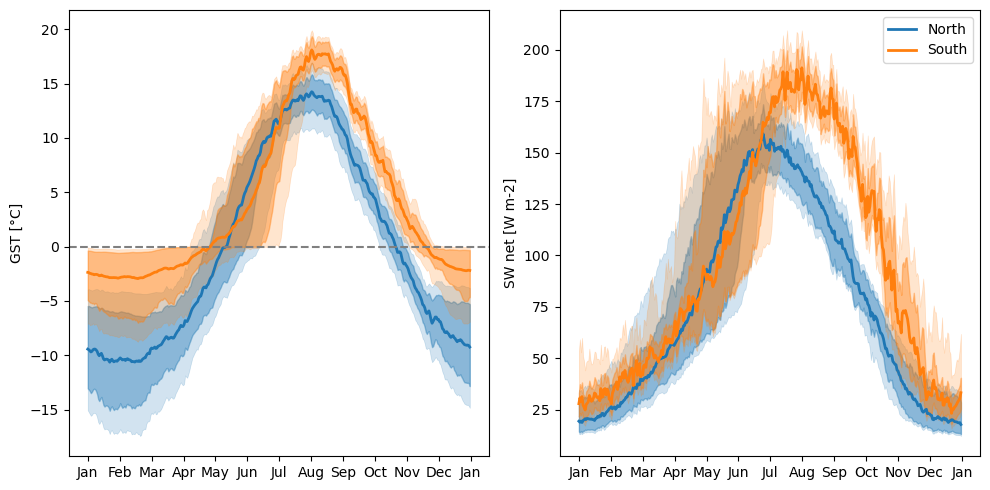

Plot of yearly, background, and transient statistics for GST for both sites side by side:


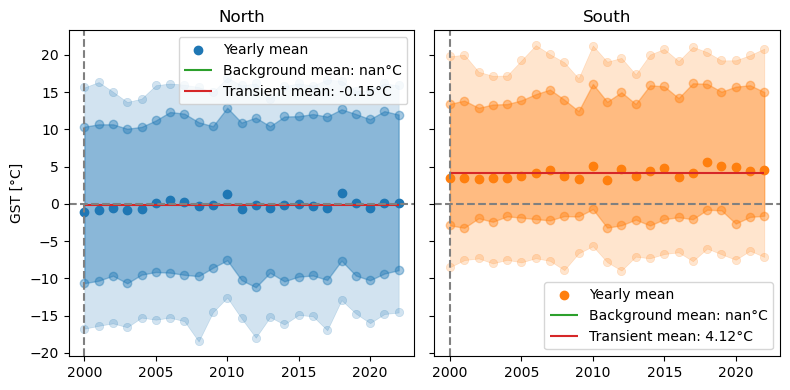

Plot of mean GST evolution vs background GST, fit, and binning per 10% quantiles for both sites:
R-square: 0.18473543303268122 , regression slope: -0.05117286075220134 , regression intercept: 0.3286162117684694
R-square: 0.14640458391824318 , regression slope: 0.057807722476505924 , regression intercept: 0.5841357865588372


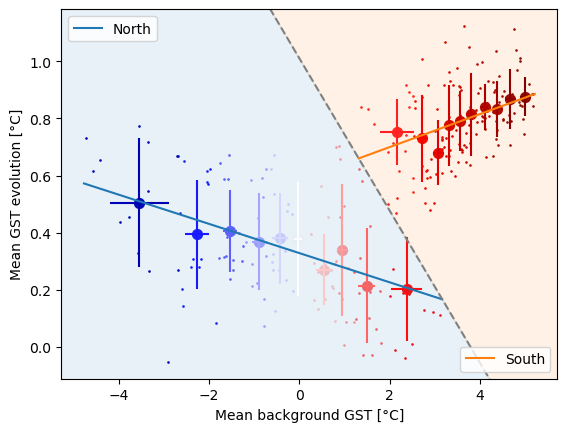

All done!


In [3]:
###############
# Ready to go #
###############

# This function will retrieve all pre-computed information about site 1 and site 2
# (given that the user already run the analysis for each site individually)
# and produces a series of plots comparing the 2 sites
plot_camparison_two_sites(list_site, list_label_site,
             list_path_forcing_list, list_path_ground, list_path_snow, list_path_swe,
             list_path_SW_direct, list_path_SW_diffuse, list_path_SW_up,
             list_path_SW_down, list_path_SW_net, list_path_LW_net,
             list_path_pickle, year_bkg_end, year_trans_end)